<a href="https://colab.research.google.com/github/thanospapastef/Rejection-Sampling---Sampling-from-standard-normal-distribution/blob/main/Sampling_from_standard_normal_distribution_with_Rejection_Sampling_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#Define target function (density of target distribution)
def target(x):
    return (1/np.sqrt(2 * math.pi)) * np.exp(-(x**2)/2)

In [3]:
#Define proposal function 1 (density of proposal distribution N(0,4)) 
def g(x):
    return (1/(2 * np.sqrt(2 * math.pi))) * np.exp(-(x**2)/8)

In [4]:
#Define proposal function 2 (density of proposal distribution N(0,16)) 
def z(x):
    return (1/(4 * np.sqrt(2 * math.pi))) * np.exp(-(x**2)/32)

In [5]:
#Define proposal function 3 (density of proposal standard cauchy distribution) 
def cauchy(x):
    return 1/(math.pi * (1 + x**2)) #πρόκειται για την standard cauchy

In [6]:
#Using sample from N(0,4) to sample from standard normal distribution
x1 = []
k1 = []
M1 = 1
i = 0
j = 0
while len(x1) < 500:
  i = i + 1
  u1 = np.asscalar(np.random.normal(0,2,1))
  k1.append(M1 * u1)
  u2 = np.asscalar(np.random.uniform(0,1,1))
  if M1 * g(u1) * u2 <= target(u1):
    j = j + 1
    x1.append(u1)
accept_rate_1 = j/i 
sim1 = i/j
print(accept_rate_1, sim1) #printing accept rate and average simulations needed to gather a simulation from standard normal distribution

0.6821282401091405 1.466


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  # This is added back by InteractiveShellApp.init_path()


In [7]:
#Using sample from N(0,16) to sample from standard normal distribution
x2 = []
k2 = []
M2 = 1
i = 0
j = 0
while len(x2) < 500:
  i = i + 1
  u1 = np.asscalar(np.random.normal(0,4,1))
  k2.append(M2 * u1)
  u2 = np.asscalar(np.random.uniform(0,1,1))
  if M2 * z(u1) * u2 <= target(u1):
    j = j + 1
    x2.append(u1)
accept_rate_2 = j/i
sim2 = i/j
print(accept_rate_2, sim2) #printing accept rate and average simulations needed to gather a simulation from standard normal distribution

0.4095004095004095 2.442


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  # This is added back by InteractiveShellApp.init_path()


In [8]:
#Using sample from standard cauchy to sample from standard normal distribution
x3 = []
k3 = []
M3 = 1
i = 0
j = 0
while len(x3) < 500:
  i = i + 1
  u1 = np.asscalar(np.random.standard_cauchy(1))
  k3.append(M3 * u1)
  u2 = np.asscalar(np.random.uniform(0,1,1))
  if M3 * cauchy(u1) * u2 <= target(u1):
    j = j + 1
    x3.append(u1)
accept_rate_3 = j/i
sim3 = i/j
print(accept_rate_3, sim3) #printing accept rate and average simulations needed to gather a simulation from standard normal distribution

0.7299270072992701 1.37


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  # This is added back by InteractiveShellApp.init_path()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

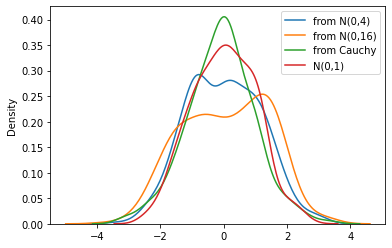

In [9]:
#histograms from each proposal vs actual standard normal distribution
standard_normal_pdf = np.random.normal(0,1,500)
sns.distplot(a = x1, hist = False, kde_kws={"label":"from N(0,4)"})
sns.distplot(a = x2, hist = False, kde_kws={"label":"from N(0,16)"})
sns.distplot(a = x3, hist = False, kde_kws={"label":"from Cauchy"})
sns.distplot(a = standard_normal_pdf, hist = False, kde_kws={"label":"N(0,1)"})
plt.legend()